***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

In [3]:
dados.Idade.min()

13

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
dados['Renda'].min()

0

In [6]:
dados['Renda'].max()

200000

In [7]:
classes = [0, 2 * 788, 5 * 788, 15 * 788, 25 * 788, 200000]

In [8]:
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [9]:
labels = ['E','D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [10]:
frequencias = pd.value_counts(
    pd.cut(x=dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True)
)

In [11]:
frequencias

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [12]:
percentuais = pd.value_counts(
    pd.cut(x=dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True), normalize=True
)

In [13]:
percentuais

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [14]:
frequencia_quantitativas = pd.DataFrame({'Frequência': frequencias, 'Percentual (%)': percentuais})
frequencia_quantitativas.head()

,Frequência,Percentual (%)
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


In [15]:
frequencia_quantitativas.sort_index(ascending = False, inplace=True)

In [16]:
frequencia_quantitativas

,Frequência,Percentual (%)
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:title={'center':'Distribuição de Renda'}, xlabel='Classe'>

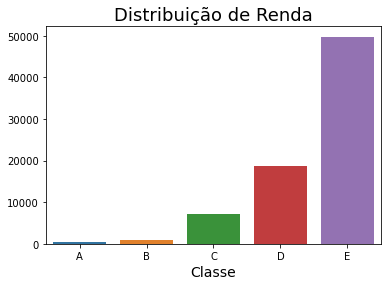

In [17]:
ax = sns.barplot(data=frequencia_quantitativas[['Frequência']].T)
ax.set_title('Distribuição de Renda', fontsize=18)
ax.set_xlabel('Classe',fontsize=14)
ax

> ### Conclusões

Quase 90% das pessoas pesquisadas na amostra coletada estão na classe D e E de acordo a renda. Ou seja, quase <b> 90% das pessoas recebem até 5 salários mínimos.</b>

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [18]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<AxesSubplot:title={'center':'Distribuição da Idade'}, xlabel='Idade', ylabel='Count'>

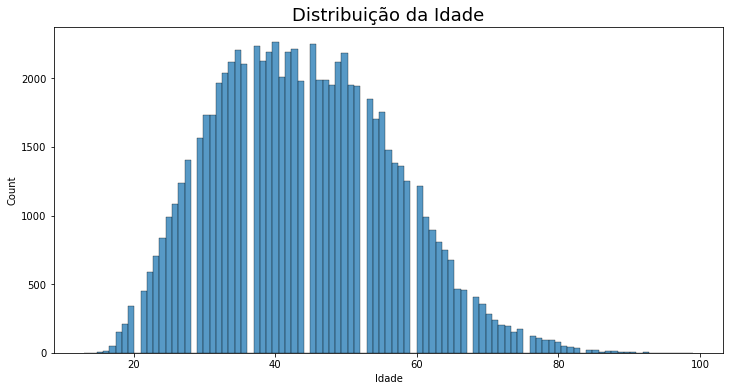

In [19]:
ax= sns.histplot(x='Idade',data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da Idade', fontsize=18)
ax

In [20]:
media_idade = dados.Idade.mean()

In [21]:
mediana_idade = dados.Idade.median()

In [22]:
moda_idade = dados.Idade.mode()

In [23]:
moda_idade[0]  < mediana_idade < media_idade

True

<AxesSubplot:title={'center':'Distribuição de Anos de Estudo'}, xlabel='Anos de Estudo', ylabel='Count'>

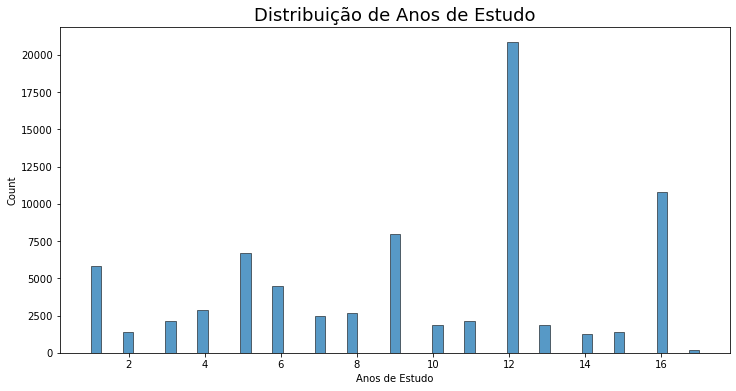

In [24]:
ax= sns.histplot(x='Anos de Estudo',data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Anos de Estudo', fontsize=18)
ax

In [25]:
media_estudo = dados['Anos de Estudo'].mean()
mediana_estudo = dados['Anos de Estudo'].median()
moda_estudo = dados['Anos de Estudo'].mode()[0]

In [26]:
media_estudo

9.469664237376367

In [27]:
mediana_estudo

11.0

In [28]:
moda_estudo

12

In [29]:
media_estudo < mediana_estudo < moda_estudo 

True

<AxesSubplot:title={'center':'Distribuição da Renda'}, xlabel='Renda', ylabel='Count'>

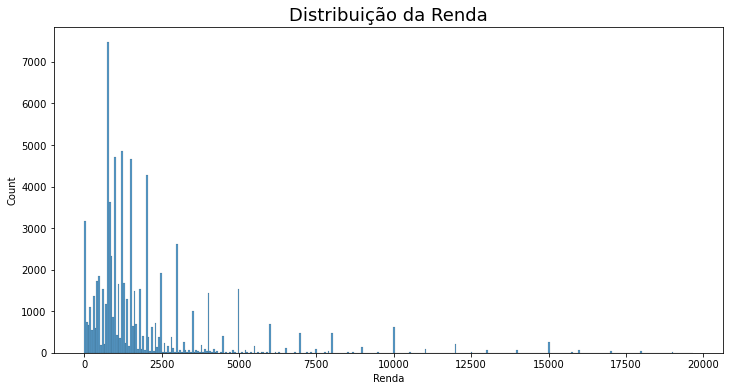

In [30]:
ax= sns.histplot(x='Renda',data=dados.query('Renda < 20000'))
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da Renda', fontsize=18)
ax

In [31]:
media_renda = dados.Renda.mean()
media_renda

2000.3831988547631

In [32]:
mediana_renda = dados.Renda.median()
mediana_renda

1200.0

In [33]:
moda_renda = dados.Renda.mode()[0]
moda_renda

788

In [34]:
moda_renda < mediana_renda < media_renda

True

<AxesSubplot:title={'center':'Distribuição da Altura'}, xlabel='Altura', ylabel='Count'>

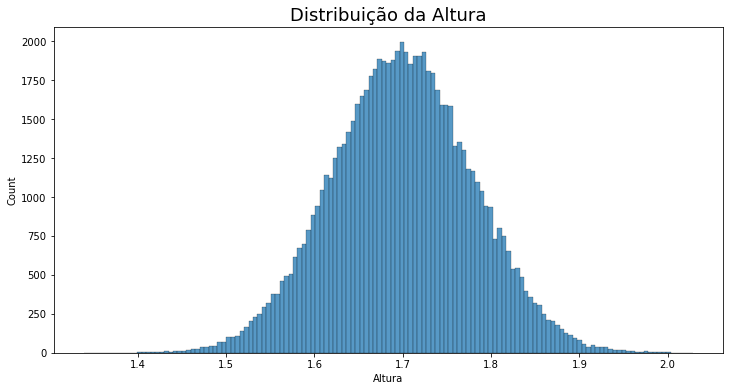

In [35]:
ax= sns.histplot(x='Altura',data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da Altura', fontsize=18)
ax

In [36]:
media_altura = dados.Altura.mean()
media_altura = round(media_altura,2)
media_altura

1.7

In [37]:
mediana_altura = dados.Altura.median()
mediana_altura = round(mediana_altura,2)
mediana_altura

1.7

In [38]:
moda_altura = dados.Altura.mode()
moda_altura = moda_altura.median()
moda_altura = round(moda_altura,1)
moda_altura

1.7

In [39]:
media_altura == mediana_altura == moda_altura

True

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:title={'center':'Distribuição da Renda'}, xlabel='Renda', ylabel='Count'>

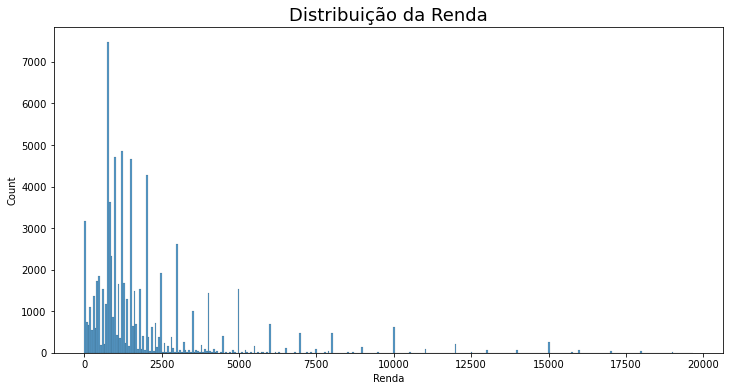

In [40]:
ax= sns.histplot(x='Renda',data=dados.query('Renda < 20000'))
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da Renda', fontsize=18)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [41]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [42]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [43]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual * 100

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [44]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [45]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [46]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [47]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [48]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [49]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [50]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [51]:
agg = pd.crosstab(dados.Sexo, dados.Cor, values=dados.Renda, aggfunc = {'mean', 'median', 'max'})
agg.rename(index=sexo, inplace=True)
agg.rename(columns=cor, inplace=True)
agg

max                                               mean  \
Cor        Indígena    Branca    Preta  Amarela     Parda     Indígena   
Sexo                                                                     
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.710938   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.386139   

                                                                median  \
Cor             Branca        Preta      Amarela        Parda Indígena   
Sexo                                                                     
Masculino  2925.744435  1603.861687  4758.251064  1659.577425    797.5   
Feminino   2109.866750  1134.596400  3027.341880  1176.758516    788.0   

                                           
Cor        Branca   Preta Amarela   Parda  
Sexo                                       
Masculino  1700.0  1200.0  2800.0  1200.0  
Feminino   1200.0   800.0  1500.0   800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [52]:
disp = pd.crosstab(dados.Sexo, dados.Cor, values=dados.Renda, aggfunc = {'mad', 'var', 'std'})
disp.rename(index=sexo, inplace=True)
disp.rename(columns=cor, inplace=True)
disp

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Cor'}, xlabel='Sexo', ylabel='Renda'>

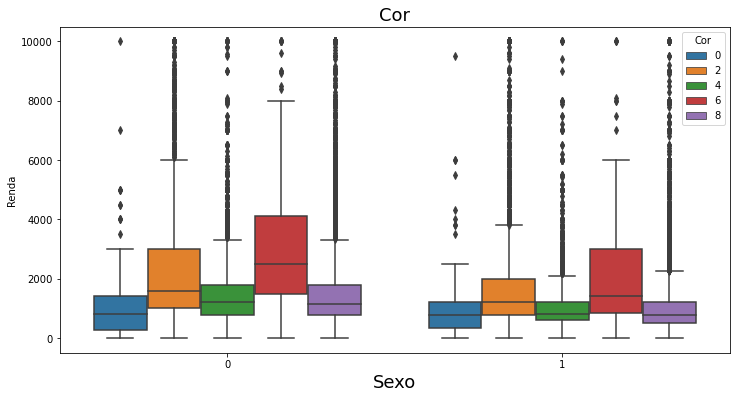

In [78]:
ax = sns.boxplot(x='Sexo', y='Renda', data=dados.query('Renda <= 10000'), hue='Cor' )
ax.figure.set_size_inches(12,6)
ax.set_title('Cor', fontsize=18)
ax.set_xlabel('Sexo', fontsize=18)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [63]:
from scipy import stats

stats.percentileofscore(dados.Renda.quantile([0.25, 0.5, 0.75]),788)

33.333333333333336

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [69]:
dados.Renda.quantile([i / 100  for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [70]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [73]:
agg2 = pd.crosstab(dados['Anos de Estudo'], dados.Sexo , values=dados.Renda, aggfunc = {'mean', 'median', 'max'})
agg2.rename(index=anos_de_estudo, inplace=True)
agg2.rename(columns=sexo, inplace=True)
agg2

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   799.494638   516.201748   
1 ano                            30000.0    2000.0   895.629047   492.771987   
2 anos                           40000.0    4000.0   931.178986   529.911638   
3 anos                           80000.0    3500.0  1109.203862   546.853916   
4 anos                           50000.0   10000.0  1302.329283   704.279111   
5 anos                           35000.0    8000.0  1338.653218   781.389776   
6 anos                           25000.0    6000.0  1448.875419   833.732824   
7 anos                           40000.0    9000.0  1465.497940   830.751004   
8 anos                           30000.0   18000.0  1639.396667   933.615351   
9 anos                           60000.0   20000.0  1508.038850   868.021700   
10 anos                          45000.0    6000.0  1731.270847   925.919225   
11 anos                         200000.0  100000.0  2117.060504  1286.790889   
12 anos                          30000.0  120000.0  2470.330776  1682.313725   
13 anos                          25000.0   20000.0  3195.099154  1911.730047   
14 anos                          50000.0   20000.0  3706.620269  2226.460457   
15 anos ou mais                 200000.0  100000.0  6134.279790  3899.513231   
Não determinados                  7000.0    3000.0  1295.761905   798.174419   

                                  median           
Sexo                           Masculino Feminino  
Anos de Estudo                                     
Sem instrução e menos de 1 ano     700.0    390.0  
1 ano                              788.0    400.0  
2 anos                             788.0    450.0  
3 anos                             800.0    500.0  
4 anos                            1000.0    788.0  
5 anos                            1045.0    788.0  
6 anos                            1200.0    788.0  
7 anos                            1200.0    788.0  
8 anos                            1300.0    800.0  
9 anos                            1200.0    788.0  
10 anos                           1218.0    800.0  
11 anos                           1500.0   1000.0  
12 anos                           1800.0   1200.0  
13 anos                           2400.0   1300.0  
14 anos                           2500.0   1600.0  
15 anos ou mais                   4000.0   2800.0  
Não determinados                  1200.0    788.0

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Cor'}, xlabel='Sexo', ylabel='Renda'>

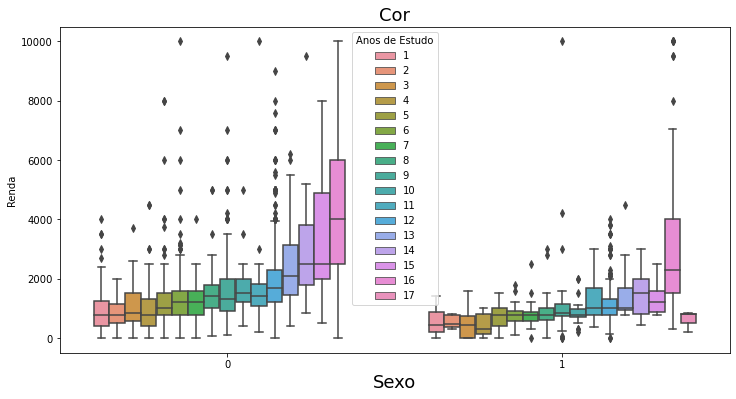

In [80]:
ax = sns.boxplot(x='Sexo', y='Renda', data=dados.query('Renda <= 10000 and Idade == 40'), hue='Anos de Estudo' )
ax.figure.set_size_inches(12,6)
ax.set_title('Cor', fontsize=18)
ax.set_xlabel('Sexo', fontsize=18)
ax

<AxesSubplot:title={'center':'Cor'}, xlabel='Sexo', ylabel='Renda'>

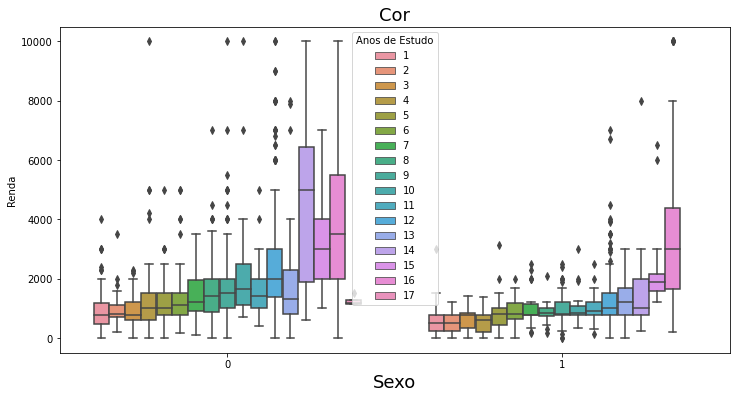

In [81]:
ax = sns.boxplot(x='Sexo', y='Renda', data=dados.query('Renda <= 10000 and Idade == 50'), hue='Anos de Estudo' )
ax.figure.set_size_inches(12,6)
ax.set_title('Cor', fontsize=18)
ax.set_xlabel('Sexo', fontsize=18)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [84]:
gr = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
gr.rename(index=uf, inplace=True)
gr

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'UF'}, xlabel='UF', ylabel='Renda'>

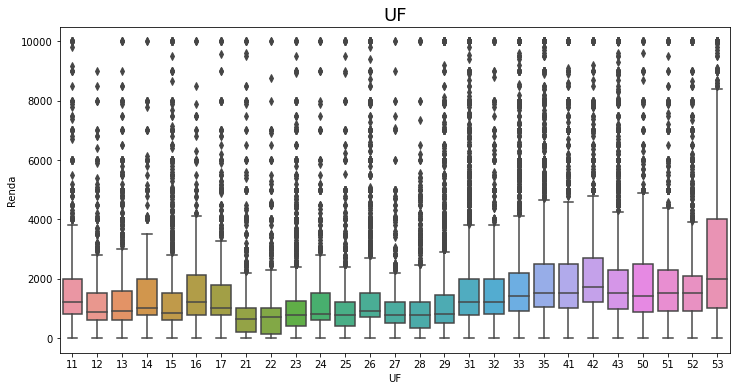

In [91]:
ax = sns.boxplot(x='UF', y='Renda', data=dados.query('Renda <= 10000'))
ax.figure.set_size_inches(12,6)
ax.set_title('UF', fontsize=18)
ax

> ### Conclusões

Escreva suas conclusões aqui...